[View in Colaboratory](https://colab.research.google.com/github/Masum06/AndroidPractice/blob/master/word2vec_gender_statistics.ipynb)

**Description:**


*   Load 3 trained models, A0, A1, B0, B1
*   Calculate similarity between 2 different Gensim word2vec model using numpy
*   Make statistical calculations with the models, such as Mean, Standar Deviation
*   Calculate number of words outside Standard Deviation
*   Print the words outside norm
*   Plot the histogram of words using Matplotlib
*   Runtime calculation
*   Working: 24.09.18




### 1. Connect to Google drive

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
#@title Default title text
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
ls -l drive/data/models/

total 5401687
-rw-r--r-- 1 root root  14873857 Aug 16 11:27 bothReplaced_model_0
-rw-r--r-- 1 root root  90776528 Aug 16 11:27 bothReplaced_model_0.trainables.syn1neg.npy
-rw-r--r-- 1 root root  90776528 Aug 16 11:27 bothReplaced_model_0.wv.vectors.npy
-rw-r--r-- 1 root root  14873854 Aug 16 11:33 bothReplaced_model_1
-rw-r--r-- 1 root root  90776528 Aug 16 11:33 bothReplaced_model_1.trainables.syn1neg.npy
-rw-r--r-- 1 root root  90776528 Aug 16 11:33 bothReplaced_model_1.wv.vectors.npy
-rw-r--r-- 1 root root  14873831 Aug 16 11:39 bothReplaced_model_2
-rw-r--r-- 1 root root  90776528 Aug 16 11:39 bothReplaced_model_2.trainables.syn1neg.npy
-rw-r--r-- 1 root root  90776528 Aug 16 11:39 bothReplaced_model_2.wv.vectors.npy
-rw-r--r-- 1 root root  14873846 Aug 16 11:45 bothReplaced_model_3
-rw-r--r-- 1 root root  90776528 Aug 16 11:45 bothReplaced_model_3.trainables.syn1neg.npy
-rw-r--r-- 1 root root  90776528 Aug 16 11:45 bothReplaced_model_3.wv.vectors.npy
-rw-r--r-- 1 root root  148738

In [0]:
!cp drive/data/models/min_3/* ./   #changed

In [5]:
ls -l

total 792084
-rw-r--r-- 1 root root      2502 Aug 18 02:24 adc.json
-rw-r--r-- 1 root root 113198003 Aug 18 02:25 bothReplaced_model_0
-rw-r--r-- 1 root root  90776528 Aug 18 02:25 bothReplaced_model_0.trainables.syn1neg.npy
-rw-r--r-- 1 root root  90776528 Aug 18 02:25 bothReplaced_model_0.wv.vectors.npy
-rw-r--r-- 1 root root 113199738 Aug 18 02:25 bothReplaced_model_1
-rw-r--r-- 1 root root  90776528 Aug 18 02:26 bothReplaced_model_1.trainables.syn1neg.npy
-rw-r--r-- 1 root root  90776528 Aug 18 02:26 bothReplaced_model_1.wv.vectors.npy
lrwxrwxrwx 1 root root         8 Aug 15 20:56 datalab -> /content/
drwxr-xr-x 2 root root      4096 Aug 18 02:24 drive/
-rw-r--r-- 1 root root   8419547 Aug 18 02:26 nonGender_model_0
-rw-r--r-- 1 root root  51176528 Aug 18 02:26 nonGender_model_0.trainables.syn1neg.npy
-rw-r--r-- 1 root root  51176528 Aug 18 02:26 nonGender_model_0.wv.vectors.npy
-rw-r--r-- 1 root root   8419547 Aug 18 02:26 nonGender_model_1
-rw-r--r-- 1 root root  51176528 Aug 18 

### Installation

In [6]:
!pip install gensim

    100% |████████████████████████████████| 23.5MB 1.3MB/s 
    100% |████████████████████████████████| 1.4MB 11.6MB/s 
    100% |████████████████████████████████| 133kB 18.8MB/s 
    100% |████████████████████████████████| 61kB 9.7MB/s 
    100% |████████████████████████████████| 4.5MB 5.5MB/s 
    100% |████████████████████████████████| 552kB 15.0MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


### Load 2 models

In [0]:
import gensim
B0 = gensim.models.Word2Vec.load('bothReplaced_model_0')
B1 = gensim.models.Word2Vec.load('bothReplaced_model_1')
A0 = gensim.models.Word2Vec.load('nonGender_model_0')
A1 = gensim.models.Word2Vec.load('nonGender_model_1')

### Similarity Matrix with numpy/Cupy

In [0]:
import numpy as np

In [4]:
mat1 = A0.wv.syn0/np.linalg.norm(A0.wv.syn0, axis=1).reshape(-1, 1) # NORMALIZE
mat2 = A1.wv.syn0/np.linalg.norm(A1.wv.syn0, axis=1).reshape(-1, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [1]:
np.linalg.norm(mat1[59])

NameError: ignored

In [9]:
size = len(B0.wv.syn0)
print(len(B0.wv.syn0), len(A1.wv.syn0))

89758 127941


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [10]:
word = "hasina"
print(A0.wv.vocab[word])
print(B0.wv.vocab[word])

Vocab(count:7360, index:617, sample_int:4294967296)
Vocab(count:235, index:9744, sample_int:4294967296)


In [11]:
setA0 = set(A0.wv.vocab)
setB0 = set(B0.wv.vocab)
print(len(setA0), len(setB0))

127941 89758


In [0]:
intersection = set.intersection(setA0, setB0)

In [13]:
# Percent of human names in unique words
1-len(intersection)/len(setA0)

0.3007011044153164

In [14]:
list(setA0-intersection)[:10]

['gautambose',
 'abulbarkat',
 'mohammadfakruzzaman',
 'alhelal',
 'sarita',
 'saidakamal',
 'shekawat',
 'bacha',
 'amirulalam',
 'alaindanielou']

In [12]:
A0["hasina"].shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(100,)

In [19]:
np.array([1,2,3]).shape

(3,)

In [13]:
A0.wv.syn0.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(127941, 100)

In [15]:
index2word = {}
word2index = {}
setA0_list = []
setB0_list = []
i = 0
for word in intersection:
  index2word[i] = word
  word2index[word] = i
  setA0_list.append(A0[word])
  setB0_list.append(B0[word])
  i+=1
vecA0 = np.array(setA0_list)
vecB0 = np.array(setB0_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [17]:
print(len(vecA0), len(vecB0))

89469 89469


In [18]:
vecB0.shape

(89469, 100)

In [19]:
size = len(vecA0)
size

89469

In [20]:
ones = np.ones((size, 1))
print(ones.shape)

(89469, 1)


Reduced from 225k to 89k

In [0]:
mat1 = vecA0/np.linalg.norm(vecA0, axis=1).reshape(-1, 1)
mat2 = vecB0/np.linalg.norm(vecB0, axis=1).reshape(-1, 1)

In [0]:
import time

In [23]:
start_time = time.time()

similarity_mat1_multiplier = mat1.T @ ones
similarity_mat1 = mat1@similarity_mat1_multiplier

end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat1.shape)

0.10015463829040527 seconds
(89469, 1)


In [24]:
start_time = time.time()
similarity_mat2_multiplier = mat2.T @ ones
similarity_mat2 = mat2 @ similarity_mat2_multiplier
end_time = time.time()
print("%s seconds" % (end_time - start_time))
print(similarity_mat2.shape)

0.06479740142822266 seconds
(89469, 1)


### Statistics

In [25]:
similarity_mat1.min()

-27935.215600738346

In [24]:
size

89469

In [0]:
similarity_mat1 = (similarity_mat1 + size)/2
similarity_mat2 = (similarity_mat2 + size)/2

In [27]:
similarity_mat1.min()

30766.892199630827

In [0]:
change_matrix = np.absolute(((similarity_mat1-similarity_mat2)/(similarity_mat1+similarity_mat2)).reshape(-1))

In [34]:
change_matrix.min()

5.6048866207708637e-08

In [75]:
print(change_matrix[word2index["bag"]])

0.00543858742563467


In [36]:
 hist, _ = np.histogram(change_matrix, bins=10)
print(hist)

[72290 11890  3261  1264   491   173    62    26    10     2]


In [37]:
std = change_matrix.std()
std

0.019463942405125997

In [38]:
mean = change_matrix.mean()
print(mean)

0.016538945035285753


In [69]:
change_matrix[word2index["newspaper"]]

0.0015626068241118708

In [76]:
std_mul = 0
#deviated_index = np.append(np.where( change_matrix > mean + std_mul*std ), np.where( change_matrix < mean - std_mul*std ) )
deviated_index = np.where( change_matrix > 0.01)[0]
print(len(deviated_index))

45749


In [77]:
deviated_index

array([    1,     2,     3, ..., 89463, 89466, 89468])

In [78]:
print(index2word[16])

hangry


See where to choose the min-cut. It has to be choosen in a place that can eliminate garbage words. Nothing else. What is the threshold for garbage words?

In [97]:
A0.wv.vocab["grandfather"].count

669

In [0]:
deviated_frequency = {}
for i in deviated_index:
  word = index2word[i]
  deviated_frequency[word] = A0.wv.vocab[word].count

#deviated_frequency = sorted(deviated_frequency.values())

In [101]:
deviated_frequency

{'myint': 12,
 'bhuley': 9,
 'kaesong': 21,
 'revascularisation': 5,
 'keyboard': 399,
 'sabha': 291,
 'hangry': 8,
 'manly': 43,
 '972': 19,
 'boramara': 3,
 'mohonhariya': 9,
 'moribund': 36,
 'taskin': 33,
 'ptt': 15,
 'kindhearted': 6,
 'ahmad': 262,
 'bullai': 3,
 'dhorey': 25,
 'khudrakati': 3,
 'bodi': 45,
 'sion': 4,
 'ntbs': 15,
 'koralia': 9,
 'oil12': 3,
 '1845': 8,
 'treehouse': 15,
 'preposition': 7,
 'creatinine': 3,
 'rangoon': 68,
 'rajsahi': 3,
 'repackaged': 6,
 'adroit': 48,
 'boley': 124,
 'coupling': 15,
 'braver': 14,
 'sampurna': 9,
 'harpercollins': 15,
 'agribusinesses': 4,
 'abettor': 9,
 'jugagni': 6,
 'urchhey': 6,
 'backpedaling': 4,
 'fragmentations': 3,
 'boomtown': 6,
 'kakilakhali': 3,
 'apocryphal': 4,
 'wildlings': 3,
 'rebalanced': 3,
 'sociopathic': 4,
 'thickest': 8,
 'galilee': 6,
 'thoughtfulness': 12,
 'mortdecai': 8,
 'voyeur': 6,
 'dighalia': 18,
 'pobitro': 4,
 'industrial': 2860,
 'fantastical': 30,
 'nought': 6,
 'jiner': 15,
 'seu': 124,
 

In [0]:
d = sorted(deviated_frequency, key = deviated_frequency.get)
temp = {}
for id in d:
  if deviated_frequency[id]>100:
    temp[id] = deviated_frequency[id]
deviated_frequency = temp

In [103]:
len(deviated_frequency)

3424

In [104]:
for item in deviated_frequency:
  print("{", item,"\t", deviated_frequency[item],"\t", change_matrix[word2index[item]] ,"}")

{ diluted 	 101 	 0.0106351129811298 }
{ azm 	 101 	 0.017378593241578612 }
{ cg 	 101 	 0.013351857646617154 }
{ tighter 	 101 	 0.012527657088019114 }
{ sonagazi 	 101 	 0.012057496223195515 }
{ stationary 	 101 	 0.01196846070836503 }
{ compliments 	 101 	 0.017249104693338978 }
{ gafargaon 	 101 	 0.01614488719272771 }
{ bhashani 	 101 	 0.03458776614749511 }
{ rashidul 	 101 	 0.0120791277440262 }
{ pavel 	 101 	 0.03895276927949506 }
{ nandigram 	 101 	 0.013339408199744163 }
{ chewing 	 101 	 0.012815393524218342 }
{ endearing 	 101 	 0.021892516474048895 }
{ shimu 	 101 	 0.022787811288123936 }
{ caucus 	 101 	 0.019435673167336003 }
{ saturia 	 101 	 0.01264019386266964 }
{ spoiled 	 101 	 0.01335744281554593 }
{ bachelors 	 101 	 0.010346901879828382 }
{ confiscated 	 101 	 0.010821688103647644 }
{ enthralling 	 101 	 0.013245902796425709 }
{ speechless 	 101 	 0.019522640151469206 }
{ kheyal 	 101 	 0.012520934962785025 }
{ approving 	 101 	 0.011134031287856257 }
{ rowling 

In [96]:
change_matrix[word2index["man"]]

0.004739053344201617

Evidence suggests that most deviated words has a frequency of less than 3. So we would discard any word that has a frequency less than 3.

This is one of our design choices.

Upto 3, none of these words make absolutely any sense.



In [49]:
len(deviated_frequency)

5262

In [0]:
count_deviated_A = []
count_deviated_B = []
i = 0
for idx in deviated_index:
  word = index2word[i]
  count_deviated_A.append(A0.wv.vocab[word].count)
  count_deviated_B.append(B0.wv.vocab[word].count)
  i+=1

In [0]:
count_deviated_A = np.array(count_deviated_A)
count_deviated_B = np.array(count_deviated_B)

In [108]:
count_deviated_A.argmax()

45129

In [109]:
index2word[count_deviated_A.argmax()]

'the'

In [65]:
change_matrix[word2index["mother"]]

0.010413650964330036

In [66]:
std_mul = 1
deviated_index = np.append(np.where( change_matrix < change_matrix[word2index["mother"]]*0.8 ), \
                           np.where( change_matrix > change_matrix[word2index["mother"]]*1.2 ) )
print(len(deviated_index))

80787


In [64]:
deviated_index

array([    0,     1,     2, ..., 89463, 89466, 89468])

In [0]:
model1.wv["the"]

In [0]:
model2.wv.syn0[model2.wv.vocab['girl'].index]

In [0]:
change_matrix[model2.wv.vocab['girl'].index]

0.9741434699634213

In [120]:
change_matrix[word2index["mother"]]

1.6717044838870312

### Plotting

In [0]:
# PLOTTING HISTOGRAM
import matplotlib.pyplot as plt
#a = np.hstack((change_matrix.normal(size=1000), change_matrix.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(change_matrix)
_ = plt.xlabel('ratio of 2 vector\'s total difference')
_ = plt.ylabel('number of vectors with this ratio')
plt.title("Histogram of change matrix")
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(change_matrix, bins=5, range=[-1, 4], histtype='step',edgecolor='r',linewidth=3)
H, bins = np.histogram(data[:6], bins=5, range=[-1, 4])
H+=np.histogram(data[6:], bins=5,range=[-1, 4])[0]

plt.bar(bins[:-1],H,width=1)

plt.show()

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

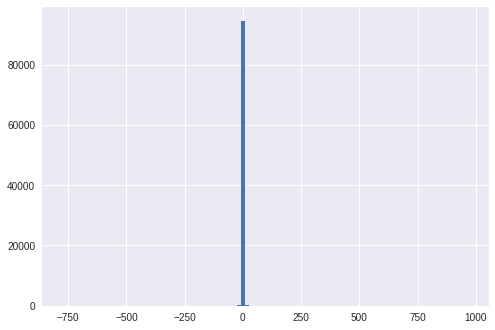

In [0]:
import matplotlib.pyplot as plt
#B = np.random.rand(1000)*100-50
_ = plt.hist(change_matrix, bins=100)
plt.show()

### Difference from "Woman" "Man"

### Time Calculation

In [0]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def diff(t_a, t_b):
    t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
    return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)

In [0]:
t_a = datetime.now()

for i in range(100):
  t_b = datetime.now()
  print("index: ",i, "time: ", diff(t_a, t_b))